In [1]:
%matplotlib inline

from pathlib import Path
import sys
sys.path.append("..")

import anamic

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipyvolume as ipv

../anamic/transformations.py:1916: UserWarning: No module named 'anamic._transformations'
  warnings.warn(str(err))


In [56]:
n_pf = 13
n_rows = 10

dimers = np.ones((n_pf, n_rows))
dimers = anamic.structure.generate_random_tapers(dimers, 0, 10)

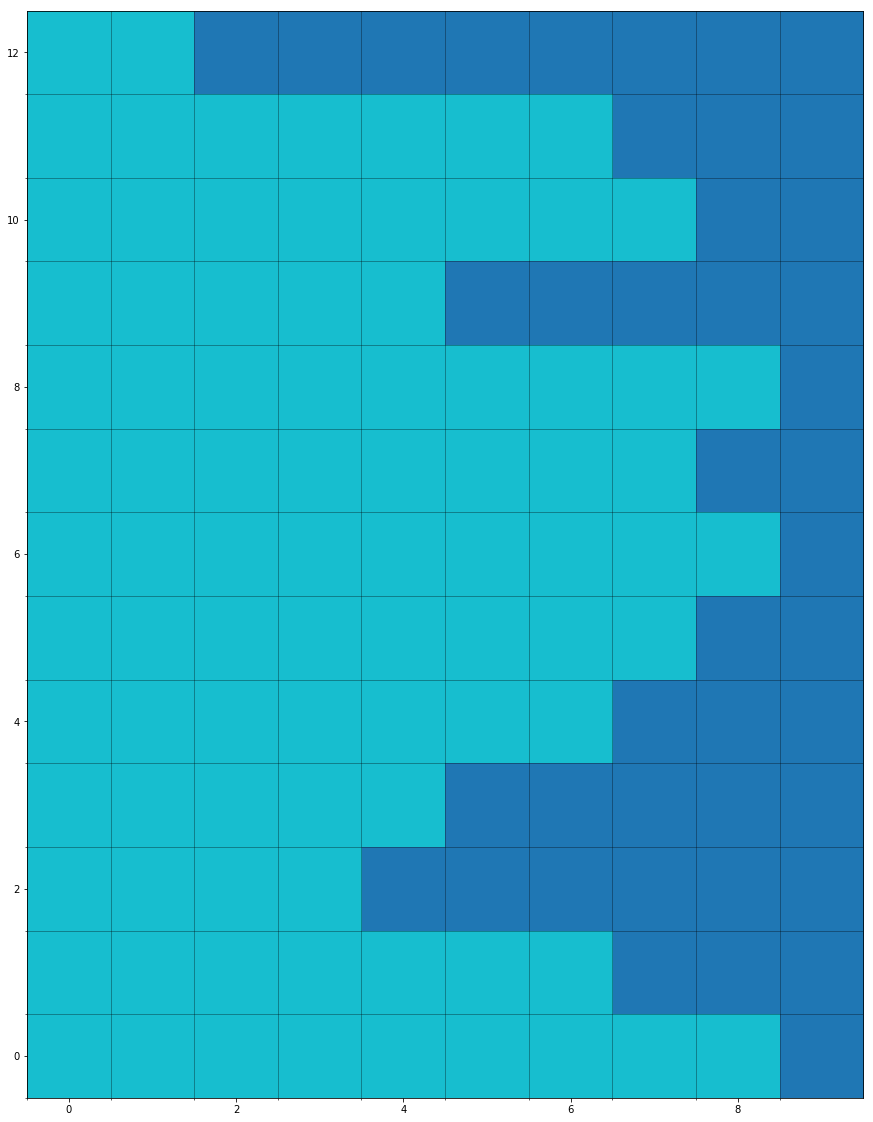

In [57]:
_ = anamic.viz.viz_dimers(dimers, start_row=0, grid=True)

In [84]:
n_rows_per_helix

3

In [90]:
n_pf = dimers.shape[0]
n_rows = dimers.shape[1]

# All positions and distances are in angstrom

# Get the parameters of geometry structure
# according to the number of pf
struct = anamic.structure.get_structure_parameters()
params = struct.loc[n_pf].to_dict()

mt_radius = ((16.4 * n_pf + 46.8) / 2) / 10
# From equation 6 of Chretien, 1996
skew_angle = - np.arctan((3 * 2 / (13 * 51.5)) - (params['helix_start_number'] * 2 / ( n_pf * 51.5)))
    
positions = []

i_row = 0
for i_pf in range(n_pf):
    datum = {}
    datum['row'] = i_row
    datum['pf'] = i_pf
    datum['helix'] = 0
    datum['x'] = mt_radius * np.sin(i_pf * np.deg2rad(params['hrot']))
    datum['y'] = mt_radius * np.cos(i_pf * np.deg2rad(params['hrot']))
    datum['z'] = i_pf * params['htrans']
    positions.append(datum)
positions = pd.DataFrame(positions) 

n_rows_per_helix = int(n_rows / params['helix_start_number'])

i_helix = 0
for i_row_per_helix in range(1, n_rows_per_helix):
    print(i_helix, i_row_per_helix, (i_row_per_helix + i_helix * n_pf) // n_pf)
    
    initial_row = positions[positions['row'] == 0]
    current_row = initial_row.copy()

    current_row['row'] = (i_row_per_helix + i_helix * n_pf) // n_pf
    current_row['helix'] = 0

    # Apply translation.
    shift = i_row_per_helix * 4 * np.cos(skew_angle)
    current_row['z'] += shift
    
    # Apply rotation
    rotation = i_row_per_helix * (360 - n_pf * params['hrot']) / params['helix_start_number'] * 2
    rotation = np.deg2rad(rotation)
    Rz = anamic.transformations.rotation_matrix(rotation, [0, 0, 1])
    current_row[['x', 'y', 'z']] = np.dot(current_row[['x', 'y', 'z']].values, Rz[:3, :3].T)

    # Add new positions to the list
    positions = positions.append(current_row, ignore_index=True)

anamic.viz.viz_dimer_positions(positions, size=6, use_ipv=True)

0 1 0
0 2 0


In [92]:
shift

8.0

In [91]:
positions.shape

(52, 6)

In [76]:
# Convert the positions to a Dataframe
for i_helix in range(1, int(params['helix_start_number']) + 1):
    
    for i_row_per_helix in range(0, n_rows_per_helix):
        print(i_helix, i_row_per_helix, (i_row_per_helix + i_helix * n_pf) // n_pf)
        initial_row = positions[positions['row'] == i_row - 1]
        current_row = last_row.copy()
        
        current_row['row'] = (i_row_per_helix + i_helix * n_pf) // n_pf
        current_row['helix'] = i_helix

        # Apply a rotation and a translation to the current row according to the last one.
        shift = i_helix * 4 * np.cos(skew_angle)
        rotation = i_helix * (360 - n_pf * params['hrot']) / params['helix_start_number']
        rotation = np.deg2rad(rotation)
        Rz = anamic.transformations.rotation_matrix(rotation, [0, 0, 1])
        current_row[['x', 'y', 'z']] = np.dot(current_row[['x', 'y', 'z']].values, Rz[:3, :3].T)
        current_row['z'] += shift

        positions = positions.append(current_row, ignore_index=True)

anamic.viz.viz_dimer_positions(positions, size=6, use_ipv=True)

1 0 1
1 1 1
1 2 1
2 0 2
2 1 2
2 2 2
3 0 3
3 1 3
3 2 3


In [27]:
import matplotlib
c = matplotlib.cm.afmhot(np.linspace(0, 1, 10))

In [77]:
positions.shape

(13, 6)

In [78]:
positions

,helix,pf,row,x,y,z
0,0,0,0,0.000000,13.000000,0.000
1,0,1,0,6.040938,11.511172,0.939
2,0,2,0,10.698195,7.385704,1.878
3,0,3,0,12.905026,1.568536,2.817
4,0,4,0,12.155954,-4.607905,3.756
5,0,5,0,8.622554,-9.728903,4.695
6,0,6,0,3.114154,-12.621491,5.634
7,0,7,0,-3.107545,-12.623120,6.573
8,0,8,0,-8.617459,-9.733417,7.512
9,0,9,0,-12.153539,-4.614269,8.451
